<a href="https://colab.research.google.com/github/MrD0balina/Fourth-Year-Project---Neutrino-Oscillations/blob/main/Week_7_Pion_Plots_and_Interpolation_work_First_Implementation_of_Pion_Weighting_First_use_of_actual_Near_Detector_dimensions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from scipy import interpolate
from scipy.interpolate import CubicSpline


from textwrap import wrap
from math import cos
from math import pi
from math import log
import pandas as pd

Data taken from: https://arxiv.org/pdf/1404.5882 - "Measurement of Charged Pion Production Yields off the NuMI Target" - Paley et al., 2014


In [7]:
## Reading in data from 2014 study; "Measurement of charged pion production yields offf the NuMI target"

Pion_Plots_df1 = pd.read_csv('Week 6 - Pion Plots TABLE 1 CSV - Copy - Now Saved as UTF 8 - Pion Plots TABLE 1 CSV - Copy - Now Saved as UTF 8.csv')


header_column_names = Pion_Plots_df1.loc[0, :].values.flatten().tolist()


Pion_Plots_df1 = Pion_Plots_df1.set_axis( header_column_names , axis = 1  )

Pion_Plots_df1 = Pion_Plots_df1.drop(0)

Pion_Plots_df1.columns = ['pz (GeV=c)',
                          'pT (GeV=c)',
                          '$N_{\pi^+}/POT$ (per proton on target)',
                          'ðN(pi^+) stat + bkgd (%)',
                          'ðN(pi^+) syst (%)',
                          '$N_{\pi^-}/POT$ (per proton on target)',
                          'ðN(pi^-) stat + bkgd (%)',
                          'ðN(pi^-) syst (%)',
                          'R = N(pi^-) / N(pi^+)',
                          'ðR stat + bkgd (%)',
                          'ðR syst (%)']

display(Pion_Plots_df1.head(3))

,pz (GeV=c),pT (GeV=c),$N_{\pi^+}/POT$ (per proton on target),ðN(pi^+) stat + bkgd (%),ðN(pi^+) syst (%),$N_{\pi^-}/POT$ (per proton on target),ðN(pi^-) stat + bkgd (%),ðN(pi^-) syst (%),R = N(pi^-) / N(pi^+),ðR stat + bkgd (%),ðR syst (%)
1,"[0.30,0.50)","[0.00,0.10)",3.32E-01,0.97,9.77,2.76E-01,0.86,9.09,0.84,1.29,5.19
2,"[0.30,0.50)","[0.10,0.20)",3.25E-01,1.05,4.86,3.56E-01,0.75,4.93,1.08,1.29,4.64
3,"[0.30,0.50)","[0.20,0.30)",1.93E-01,1.46,5.30,1.91E-01,1.09,5.24,1,1.82,4.59


#Coding question about the way Python processes strings

In [8]:
X = Pion_Plots_df1['pz (GeV=c)'][8]
print(type(X))
print(X)
Y = X [ 1 : -1 ]
print(Y)
Z =  Y.split(",")
print(Z)
print(type(Z[0]))
#Z = float(Z[1])
#diff = float(Z) - float(M)
#print(abs(diff) )

print(min(Z))
print(type(Z[0]))
print(max(Z))
print(type(Z[1]))

sum = max(Z) + min(Z)
print(sum)

<class 'str'>
[0.50,0.62)
0.50,0.62
['0.50', '0.62']
<class 'str'>
0.50
<class 'str'>
0.62
<class 'str'>
0.620.50


In [9]:
#A = [ "0.05" , "0.1"  ]
A = [ "a" , "b"  ]
B = [ "b" , "a"  ]
C = [ "0.0199999999999" , "0.02"  ]
print(min(C))
print(type(C[0]))
print(max(C))

0.0199999999999
<class 'str'>
0.02


#Converting first column of the dataframe into floats and calculating bin widths

In [10]:
## Converting the first column of the dataframe from string to float values.

## Calculating the bin width of each row

interval_mid_list = []
bin_width_list = []

for i in range(len(Pion_Plots_df1['pz (GeV=c)'])):

  i = i + 1
  X = Pion_Plots_df1['pz (GeV=c)'][i]
  Y = X [ 1 : -1 ]
  Z =  Y.split(",")

  for j in range(len(Z)):
    Z[j] = float(Z[j])

  diff = abs( ( Z[0] - Z[1] ) / 2  )

  bin_width_list.append(diff)

  interval_mid_value = min(Z) + diff
  diff = 0
  interval_mid_list.append(interval_mid_value)

#display(interval_mid_list)
bin_width_array = np.array(bin_width_list)
interval_mid_array = np.array(interval_mid_list)
display(np.shape(interval_mid_array))
display(np.shape(Pion_Plots_df1['pz (GeV=c)']))

## Adding a column to the dataframe that displays the bin width of each row.

Pion_Plots_df1['pz (GeV=c) - mid range value'] = interval_mid_array.tolist()

Pion_Plots_df1['bin width'] = bin_width_array.tolist()



display(Pion_Plots_df1.head(5))

(124,)

(124,)

,pz (GeV=c),pT (GeV=c),$N_{\pi^+}/POT$ (per proton on target),ðN(pi^+) stat + bkgd (%),ðN(pi^+) syst (%),$N_{\pi^-}/POT$ (per proton on target),ðN(pi^-) stat + bkgd (%),ðN(pi^-) syst (%),R = N(pi^-) / N(pi^+),ðR stat + bkgd (%),ðR syst (%),pz (GeV=c) - mid range value,bin width
1,"[0.30,0.50)","[0.00,0.10)",3.32E-01,0.97,9.77,2.76E-01,0.86,9.09,0.84,1.29,5.19,0.40,0.10
2,"[0.30,0.50)","[0.10,0.20)",3.25E-01,1.05,4.86,3.56E-01,0.75,4.93,1.08,1.29,4.64,0.40,0.10
3,"[0.30,0.50)","[0.20,0.30)",1.93E-01,1.46,5.30,1.91E-01,1.09,5.24,1,1.82,4.59,0.40,0.10
4,"[0.30,0.50)","[0.30,0.40)",1.06E-01,1.97,8.15,9.49E-02,1.68,7.39,0.95,2.59,4.61,0.40,0.10
5,"[0.50,0.62)","[0.00,0.10)",9.20E-02,1.22,5.10,7.54E-02,1.16,4.98,0.83,1.69,4.59,0.56,0.06


In [11]:
# Organising new columns that have just been created
column_to_move = Pion_Plots_df1.pop("pz (GeV=c) - mid range value")

Pion_Plots_df1.insert(1, "pz (GeV=c) - mid range value", column_to_move)

column_to_move = Pion_Plots_df1.pop("bin width")

Pion_Plots_df1.insert(2, "bin width", column_to_move)

In [12]:
# Allocating colours to rows of the dataframe based upon pion transverse momentum

# Creating a new column in the dataframe to store these allocated colour codes

pT_colour_code_list = []

for i in range(len(Pion_Plots_df1['pT (GeV=c)'])):

  i = i + 1
  X = Pion_Plots_df1['pT (GeV=c)'][i]
  Y = X [ 1 : -1 ]
  Z =  Y.split(",")

  for j in range(len(Z)):
    Z[j] = float(Z[j])

  if Z[0] == 0.00:
    colour_code = 0
  elif Z[0] == 0.10:
    colour_code = 1
  elif Z[0] == 0.20:
    colour_code = 2
  elif Z[0] == 0.30:
    colour_code = 3
  elif Z[0] == 0.40:
    colour_code = 4
  else:
    colour_code = 5

  pT_colour_code_list.append(colour_code)

pT_colour_code_array = np.array(pT_colour_code_list)
display(np.shape(pT_colour_code_array))
display(np.shape(Pion_Plots_df1['pT (GeV=c)']))

(124,)

(124,)

In [13]:
# Organising the positions of the new columns in the dataframe
Pion_Plots_df1['pT (GeV=c) - plot colour codes'] = pT_colour_code_array.tolist()
column_to_move = Pion_Plots_df1.pop("pT (GeV=c) - plot colour codes")
Pion_Plots_df1.insert(3, "pT (GeV=c) - plot colour codes", column_to_move)
display(Pion_Plots_df1.head(5))


,pz (GeV=c),pz (GeV=c) - mid range value,bin width,pT (GeV=c) - plot colour codes,pT (GeV=c),$N_{\pi^+}/POT$ (per proton on target),ðN(pi^+) stat + bkgd (%),ðN(pi^+) syst (%),$N_{\pi^-}/POT$ (per proton on target),ðN(pi^-) stat + bkgd (%),ðN(pi^-) syst (%),R = N(pi^-) / N(pi^+),ðR stat + bkgd (%),ðR syst (%)
1,"[0.30,0.50)",0.40,0.10,0,"[0.00,0.10)",3.32E-01,0.97,9.77,2.76E-01,0.86,9.09,0.84,1.29,5.19
2,"[0.30,0.50)",0.40,0.10,1,"[0.10,0.20)",3.25E-01,1.05,4.86,3.56E-01,0.75,4.93,1.08,1.29,4.64
3,"[0.30,0.50)",0.40,0.10,2,"[0.20,0.30)",1.93E-01,1.46,5.30,1.91E-01,1.09,5.24,1,1.82,4.59
4,"[0.30,0.50)",0.40,0.10,3,"[0.30,0.40)",1.06E-01,1.97,8.15,9.49E-02,1.68,7.39,0.95,2.59,4.61
5,"[0.50,0.62)",0.56,0.06,0,"[0.00,0.10)",9.20E-02,1.22,5.10,7.54E-02,1.16,4.98,0.83,1.69,4.59


In [14]:
# Ascertaining the data types in each of the columns of the dataframe:

print(Pion_Plots_df1.dtypes)

pz (GeV=c)                                 object
pz (GeV=c) - mid range value              float64
bin width                                 float64
pT (GeV=c) - plot colour codes              int64
pT (GeV=c)                                 object
$N_{\pi^+}/POT$ (per proton on target)     object
ðN(pi^+) stat + bkgd (%)                   object
ðN(pi^+) syst (%)                         float64
$N_{\pi^-}/POT$ (per proton on target)     object
ðN(pi^-) stat + bkgd (%)                   object
ðN(pi^-) syst (%)                         float64
R = N(pi^-) / N(pi^+)                      object
ðR stat + bkgd (%)                         object
ðR syst (%)                               float64
dtype: object


In [15]:
# Converting columns into floats - in order to amke plotting possible

Pion_Plots_df1["N_{\pi^+}/POT --- float"] = Pion_Plots_df1["$N_{\pi^+}/POT$ (per proton on target)"].astype(float)

column_to_move = Pion_Plots_df1.pop("N_{\pi^+}/POT --- float")
Pion_Plots_df1.insert(5, "N_{\pi^+}/POT --- float", column_to_move)
display(Pion_Plots_df1.head(-5))

,pz (GeV=c),pz (GeV=c) - mid range value,bin width,pT (GeV=c) - plot colour codes,pT (GeV=c),N_{\pi^+}/POT --- float,$N_{\pi^+}/POT$ (per proton on target),ðN(pi^+) stat + bkgd (%),ðN(pi^+) syst (%),$N_{\pi^-}/POT$ (per proton on target),ðN(pi^-) stat + bkgd (%),ðN(pi^-) syst (%),R = N(pi^-) / N(pi^+),ðR stat + bkgd (%),ðR syst (%)
1,"[0.30,0.50)",0.40,0.10,0,"[0.00,0.10)",0.332000,3.32E-01,0.97,9.77,2.76E-01,0.86,9.09,0.84,1.29,5.19
2,"[0.30,0.50)",0.40,0.10,1,"[0.10,0.20)",0.325000,3.25E-01,1.05,4.86,3.56E-01,0.75,4.93,1.08,1.29,4.64
3,"[0.30,0.50)",0.40,0.10,2,"[0.20,0.30)",0.193000,1.93E-01,1.46,5.30,1.91E-01,1.09,5.24,1,1.82,4.59
4,"[0.30,0.50)",0.40,0.10,3,"[0.30,0.40)",0.106000,1.06E-01,1.97,8.15,9.49E-02,1.68,7.39,0.95,2.59,4.61
5,"[0.50,0.62)",0.56,0.06,0,"[0.00,0.10)",0.092000,9.20E-02,1.22,5.10,7.54E-02,1.16,4.98,0.83,1.69,4.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,"[56.00,68.00)",62.00,6.00,0,"[0.00,0.10)",0.000190,1.90E-04,11.86,4.92,NaN,NaN,NaN,NaN,NaN,NaN
116,"[56.00,68.00)",62.00,6.00,1,"[0.10,0.20)",0.000424,4.24E-04,9.19,4.65,8.79E-05,16.67,5.70,0.19,19.03,4.58
117,"[56.00,68.00)",62.00,6.00,2,"[0.20,0.30)",0.000580,5.80E-04,6.28,5.96,1.71E-04,11.59,4.69,0.36,13.18,4.58
118,"[56.00,68.00)",62.00,6.00,3,"[0.30,0.40)",0.000627,6.27E-04,5.64,4.68,1.52E-04,11.85,5.76,0.3,13.12,4.58


In [16]:
# We divide the count by the bin width.  When we make the height of each bin the count divided by the bin width, the total area of the bin is equal to the count.

Pion_Plots_df1["N_{\pi^+}/POT / bin width"]  =  Pion_Plots_df1["N_{\pi^+}/POT --- float"] / Pion_Plots_df1["bin width"]
column_to_move = Pion_Plots_df1.pop("N_{\pi^+}/POT / bin width")
Pion_Plots_df1.insert(6, "N_{\pi^+}/POT / bin width", column_to_move)

In [17]:
# creating a new column in the dataframe that will be filled with the final values to be plotted in the complete and correct plot

Pion_Plots_df1["Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"]

display(Pion_Plots_df1)

# CREATING A COPY OF THE DATAFRAME FOR LATER ATTEMPT TO USE "df.loc" rather than the for loop chained assignment I use in the next cell down
COPY_OF_Pion_Plots_df1 = Pion_Plots_df1.copy()

,pz (GeV=c),pz (GeV=c) - mid range value,bin width,pT (GeV=c) - plot colour codes,pT (GeV=c),N_{\pi^+}/POT --- float,N_{\pi^+}/POT / bin width,$N_{\pi^+}/POT$ (per proton on target),ðN(pi^+) stat + bkgd (%),ðN(pi^+) syst (%),$N_{\pi^-}/POT$ (per proton on target),ðN(pi^-) stat + bkgd (%),ðN(pi^-) syst (%),R = N(pi^-) / N(pi^+),ðR stat + bkgd (%),ðR syst (%),Final pi^+ plot value
1,"[0.30,0.50)",0.40,0.10,0,"[0.00,0.10)",0.332000,3.320000,3.32E-01,0.97,9.77,2.76E-01,0.86,9.09,0.84,1.29,5.19,3.320000
2,"[0.30,0.50)",0.40,0.10,1,"[0.10,0.20)",0.325000,3.250000,3.25E-01,1.05,4.86,3.56E-01,0.75,4.93,1.08,1.29,4.64,3.250000
3,"[0.30,0.50)",0.40,0.10,2,"[0.20,0.30)",0.193000,1.930000,1.93E-01,1.46,5.30,1.91E-01,1.09,5.24,1,1.82,4.59,1.930000
4,"[0.30,0.50)",0.40,0.10,3,"[0.30,0.40)",0.106000,1.060000,1.06E-01,1.97,8.15,9.49E-02,1.68,7.39,0.95,2.59,4.61,1.060000
5,"[0.50,0.62)",0.56,0.06,0,"[0.00,0.10)",0.092000,1.533333,9.20E-02,1.22,5.10,7.54E-02,1.16,4.98,0.83,1.69,4.59,1.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,"[56.00,68.00)",62.00,6.00,5,"[0.50,2.00)",0.002810,0.000468,2.81E-03,2.77,4.79,1.03E-03,4.51,5.04,0.36,5.29,4.58,0.000468
121,"[68.00,80.00)",74.00,6.00,2,"[0.20,0.30)",0.000236,0.000039,2.36E-04,10.32,5.45,NaN,NaN,NaN,NaN,NaN,NaN,0.000039
122,"[68.00,80.00)",74.00,6.00,3,"[0.30,0.40)",0.000188,0.000031,1.88E-04,10.39,4.89,NaN,NaN,NaN,NaN,NaN,NaN,0.000031
123,"[68.00,80.00)",74.00,6.00,4,"[0.40,0.50)",0.000188,0.000031,1.88E-04,10.15,4.80,NaN,NaN,NaN,NaN,NaN,NaN,0.000031


In [18]:
# Modifying the values in the newly created column: " Pion_Plots_df1["Final pi^+ plot value"] "
# The values in this column are multiplied by a value that is dictated by colour codes (which have been determined by the pions' transverse momenta values)

for i in range( 1 , len(Pion_Plots_df1["pT (GeV=c) - plot colour codes"] ) ):
  if Pion_Plots_df1["pT (GeV=c) - plot colour codes"][i] == 0:
    Pion_Plots_df1["Final pi^+ plot value"][i] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"][i]
  elif Pion_Plots_df1["pT (GeV=c) - plot colour codes"][i] == 1:
    Pion_Plots_df1["Final pi^+ plot value"][i] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"][i] * 3
  elif Pion_Plots_df1["pT (GeV=c) - plot colour codes"][i] == 2:
    Pion_Plots_df1["Final pi^+ plot value"][i] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"][i] * 10
  elif Pion_Plots_df1["pT (GeV=c) - plot colour codes"][i] == 3:
    Pion_Plots_df1["Final pi^+ plot value"][i] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"][i] * 30
  elif Pion_Plots_df1["pT (GeV=c) - plot colour codes"][i] == 4:
    Pion_Plots_df1["Final pi^+ plot value"][i] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"][i] * 100
  else:
    Pion_Plots_df1["Final pi^+ plot value"][i] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"][i] * 300

<ipython-input-18-5b94c30e95a4>:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Pion_Plots_df1["Final pi^+ plot value"][i] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"][i]
<ipython-input-18-5b94c30e95a4>:6: SettingWithCopyWarning: 
A value 

In [ ]:
#################### WHAT IS IN THE ABOVE CELL, CAN BE DONE USING "df.loc" ## Below is the code ####################


# COPY_OF_Pion_Plots_df1.loc[COPY_OF_Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 0, "Final pi^+ plot value"] = COPY_OF_Pion_Plots_df1["N_{\pi^+}/POT / bin width"]
# COPY_OF_Pion_Plots_df1.loc[COPY_OF_Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 1, "Final pi^+ plot value"] = COPY_OF_Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 3
# COPY_OF_Pion_Plots_df1.loc[COPY_OF_Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 2, "Final pi^+ plot value"] = COPY_OF_Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 10
# COPY_OF_Pion_Plots_df1.loc[COPY_OF_Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 3, "Final pi^+ plot value"] = COPY_OF_Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 30
# COPY_OF_Pion_Plots_df1.loc[COPY_OF_Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 4, "Final pi^+ plot value"] = COPY_OF_Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 100
# COPY_OF_Pion_Plots_df1.loc[COPY_OF_Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 5, "Final pi^+ plot value"] = COPY_OF_Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 300
# display(COPY_OF_Pion_Plots_df1)

In [19]:
# Final reorganisation of columns in the dataframe

column_to_move = Pion_Plots_df1.pop("Final pi^+ plot value")
Pion_Plots_df1.insert(8, "Final pi^+ plot value", column_to_move)

column_to_move = Pion_Plots_df1.pop("$N_{\pi^+}/POT$ (per proton on target)")
Pion_Plots_df1.insert(5, "$N_{\pi^+}/POT$ (per proton on target)", column_to_move)

column_to_move = Pion_Plots_df1.pop("$N_{\pi^+}/POT$ (per proton on target)")
Pion_Plots_df1.insert(5, "$N_{\pi^+}/POT$ (per proton on target)", column_to_move)

display(Pion_Plots_df1.head(5))

,pz (GeV=c),pz (GeV=c) - mid range value,bin width,pT (GeV=c) - plot colour codes,pT (GeV=c),$N_{\pi^+}/POT$ (per proton on target),N_{\pi^+}/POT --- float,N_{\pi^+}/POT / bin width,Final pi^+ plot value,ðN(pi^+) stat + bkgd (%),ðN(pi^+) syst (%),$N_{\pi^-}/POT$ (per proton on target),ðN(pi^-) stat + bkgd (%),ðN(pi^-) syst (%),R = N(pi^-) / N(pi^+),ðR stat + bkgd (%),ðR syst (%)
1,"[0.30,0.50)",0.40,0.10,0,"[0.00,0.10)",3.32E-01,0.332,3.320000,3.320000,0.97,9.77,2.76E-01,0.86,9.09,0.84,1.29,5.19
2,"[0.30,0.50)",0.40,0.10,1,"[0.10,0.20)",3.25E-01,0.325,3.250000,9.750000,1.05,4.86,3.56E-01,0.75,4.93,1.08,1.29,4.64
3,"[0.30,0.50)",0.40,0.10,2,"[0.20,0.30)",1.93E-01,0.193,1.930000,19.300000,1.46,5.30,1.91E-01,1.09,5.24,1,1.82,4.59
4,"[0.30,0.50)",0.40,0.10,3,"[0.30,0.40)",1.06E-01,0.106,1.060000,31.800000,1.97,8.15,9.49E-02,1.68,7.39,0.95,2.59,4.61
5,"[0.50,0.62)",0.56,0.06,0,"[0.00,0.10)",9.20E-02,0.092,1.533333,1.533333,1.22,5.10,7.54E-02,1.16,4.98,0.83,1.69,4.59


#CODING QUESTION: Would really appreciate a more "pythonic" way of producing the legend with labels and handles.

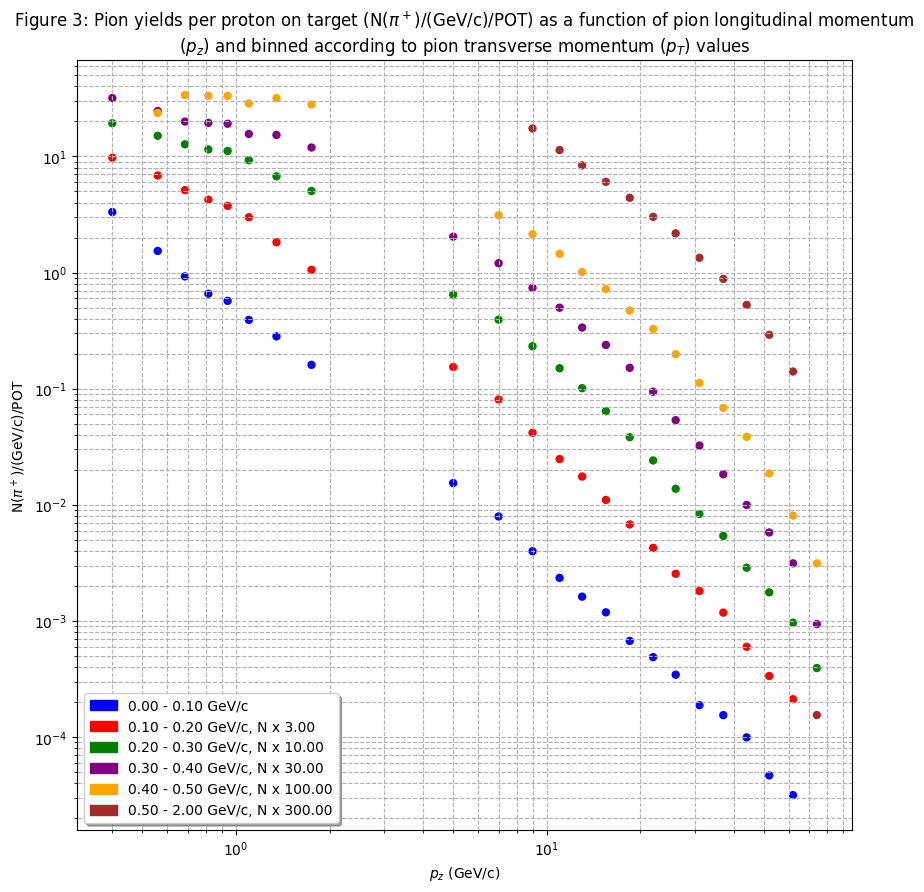

In [20]:
# Correct and complete plot

colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

labels_list = [ "0.00 - 0.10 GeV/c" , "0.10 - 0.20 GeV/c, N x 3.00"  ,  "0.20 - 0.30 GeV/c, N x 10.00"  ,  "0.30 - 0.40 GeV/c, N x 30.00"  ,  "0.40 - 0.50 GeV/c, N x 100.00"  ,  "0.50 - 2.00 GeV/c, N x 300.00"  ]

## I'd really appreciate some insight into a more "pythonic" way to code this legend handles stuff.

blue_patch = mpatches.Patch(color='blue', label='0.00 - 0.10 GeV/c' )
red_patch = mpatches.Patch(color='red', label='0.10 - 0.20 GeV/c, N x 3.00')
green_patch = mpatches.Patch(color='green', label='0.20 - 0.30 GeV/c, N x 10.00')
purple_patch = mpatches.Patch(color='purple', label='0.30 - 0.40 GeV/c, N x 30.00')
orange_patch = mpatches.Patch(color='orange', label='0.40 - 0.50 GeV/c, N x 100.00')
brown_patch = mpatches.Patch(color='brown', label='0.50 - 2.00 GeV/c, N x 300.00')

# line1 = Line2D([], [], color="white", marker='o', markerfacecolor="blue" , label='0.00 - 0.10 GeV/c' )
# line2 = Line2D([], [], color="white", marker='o', markerfacecolor="red" , label='0.10 - 0.20 GeV/c, N x 3.00')
# line3 = Line2D([], [], color="white", marker='o', markersize=5,  markerfacecolor="green" , label='0.20 - 0.30 GeV/c, N x 10.00')
# line4 = Line2D([], [], color="white", marker='o', markersize=10, markerfacecolor="purple" , label='0.30 - 0.40 GeV/c, N x 30.00')
# line5 = Line2D([], [], color="white", marker='o', markerfacecolor="orange", label='0.40 - 0.50 GeV/c, N x 100.00')
# line6 = Line2D([], [], color="white", marker='o', markerfacecolor="brown", label='0.50 - 2.00 GeV/c, N x 300.00')


handles_for_legend =  [  blue_patch , red_patch ,  green_patch ,  purple_patch , orange_patch , brown_patch  ]


# circles_this_time = [   line1 , line2 ,  line3 ,  line4 , line5 , line6  ]


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

## I think there is an incorrect multiple of 300 in this line ## plt.scatter(   x = Pion_Plots_df1["pz (GeV=c) - mid range value"]   ,   y = Pion_Plots_df1["Final pi^+ plot value"] * 300    ,   c = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours) , s = 25 , label =  labels_list )

plt.scatter(   x = Pion_Plots_df1["pz (GeV=c) - mid range value"]   ,   y = Pion_Plots_df1["Final pi^+ plot value"]    ,   c = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours) , s = 25 , label =  labels_list )

#plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"] * 300 , yerr  =  None , xerr = Pion_Plots_df1["bin width"] , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"] )

#plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"] * 300 , yerr  =  None , xerr = Pion_Plots_df1["bin width"] )


plt.xscale("log")
plt.yscale("log")
plt.grid( True , which = "both" , ls = "--" )

plt.legend(  labels = labels_list , handles = handles_for_legend , shadow = True , fancybox = True )


# plt.legend( handles = circles_this_time )

plt.title("\n".join(wrap(r"Figure 3: Pion yields per proton on target (N($\pi^+$)/(GeV/c)/POT) as a function of pion longitudinal momentum ($p_{z}$) and binned according to pion transverse momentum ($p_{T}$) values" , 120 ) ) )


plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.savefig('Figure 3: Positive pion yields per proton on target - binned according to pion longitudinal and transverse momenta .png' , dpi=200 , bbox_inches = "tight")

plt.show()

#SAME PLOT WITH ERROR BARS

#CODING QUESTION: How do you put caps on the error bars? When I enter a non-zero value for the capsize parameter it completely distorts my plot (appears to remove the log-log scale).  I created a column in the dataframe with the capsize stored as a float and it did not work, I did the same thing with error bar line width and it did work.  So there is something in particular going on with error bar capsize?

#CODING QUESTION - I had to set "fmt", the "format" of the data points to "none", have you any experience of doing this?  Why does this work?
#CODING QUESTION - Setting "fmt" to "none" means that the errorbars are plotted without any data markers.  What does this mean?

In [21]:
Pion_Plots_df1["error bar capsize"] = float(1)
Pion_Plots_df1["error bar line width"] = float(0.5)

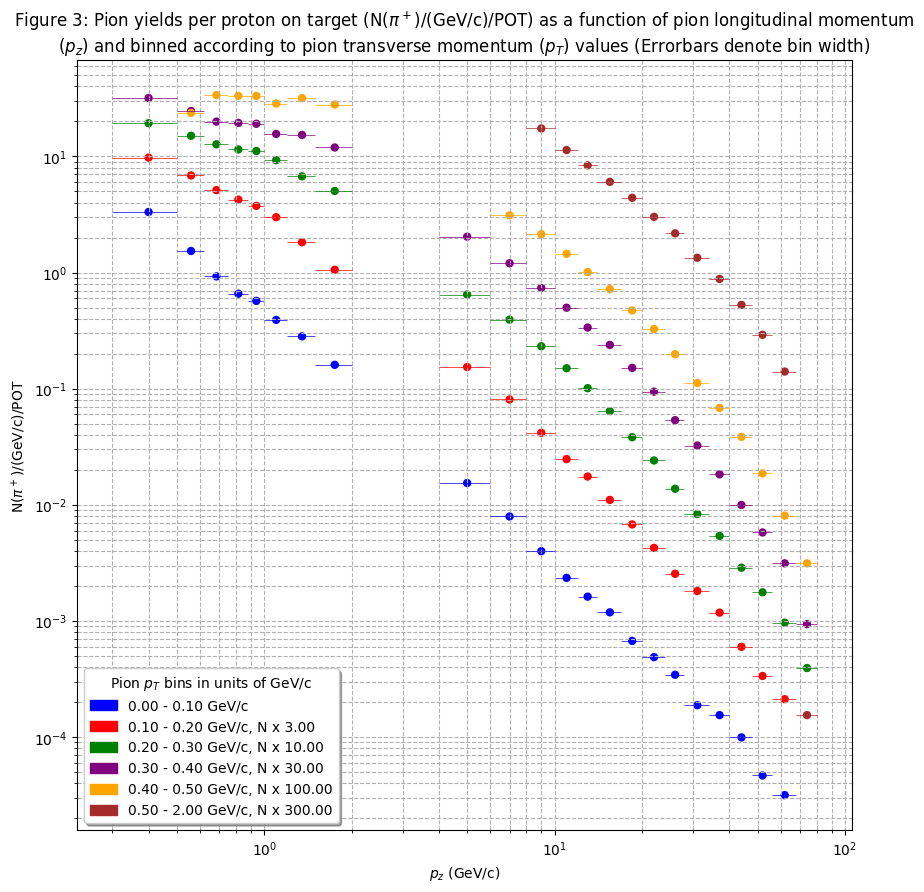

In [22]:
## CORRECT PLOT WITH ERROR BARS ##

colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

labels_list = [ "0.00 - 0.10 GeV/c" , "0.10 - 0.20 GeV/c, N x 3.00"  ,  "0.20 - 0.30 GeV/c, N x 10.00"  ,  "0.30 - 0.40 GeV/c, N x 30.00"  ,  "0.40 - 0.50 GeV/c, N x 100.00"  ,  "0.50 - 2.00 GeV/c, N x 300.00"  ]



blue_patch = mpatches.Patch(color='blue', label='0.00 - 0.10 GeV/c' )
red_patch = mpatches.Patch(color='red', label='0.10 - 0.20 GeV/c, N x 3.00')
green_patch = mpatches.Patch(color='green', label='0.20 - 0.30 GeV/c, N x 10.00')
purple_patch = mpatches.Patch(color='purple', label='0.30 - 0.40 GeV/c, N x 30.00')
orange_patch = mpatches.Patch(color='orange', label='0.40 - 0.50 GeV/c, N x 100.00')
brown_patch = mpatches.Patch(color='brown', label='0.50 - 2.00 GeV/c, N x 300.00')



handles_for_legend =  [  blue_patch , red_patch ,  green_patch ,  purple_patch , orange_patch , brown_patch  ]


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.scatter(   x = Pion_Plots_df1["pz (GeV=c) - mid range value"]   ,   y = Pion_Plots_df1["Final pi^+ plot value"]    ,   c = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours) , s = 25 , label =  labels_list )


#plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"] * 300 , yerr  =  None , xerr = Pion_Plots_df1["bin width"] , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"] )

#plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"], yerr  =  None , xerr = Pion_Plots_df1["bin width"] ,
#             ls = None , fmt = 'none' , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours), elinewidth = 0.5 , capsize  = Pion_Plots_df1["error bar capsize"])

plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"], yerr  =  None , xerr = Pion_Plots_df1["bin width"] ,
            ls = None , fmt = 'none' , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours), elinewidth = Pion_Plots_df1["error bar line width"] )


# plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"], yerr  =  None , xerr = Pion_Plots_df1["bin width"] ,
#              ls = None , fmt = 'none' , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours), elinewidth = 0.5  )

plt.xscale("log")
plt.yscale("log")
plt.grid( True , which = "both" , ls = "--" )

plt.legend(  labels = labels_list , handles = handles_for_legend , shadow = True , fancybox = True , title = r"Pion $p_{T}$ bins in units of GeV/c" )

plt.title("\n".join(wrap(r"Figure 3: Pion yields per proton on target (N($\pi^+$)/(GeV/c)/POT) as a function of pion longitudinal momentum ($p_{z}$) and binned according to pion transverse momentum ($p_{T}$) values (Errorbars denote bin width)" , 120 ) ) )


plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.savefig('Figure 3: Positive pion yields per proton on target - binned according to pion longitudinal and transverse momenta .png' , dpi=200 , bbox_inches = "tight")


plt.show()

#INTERPOLATION WORK BEGINS:

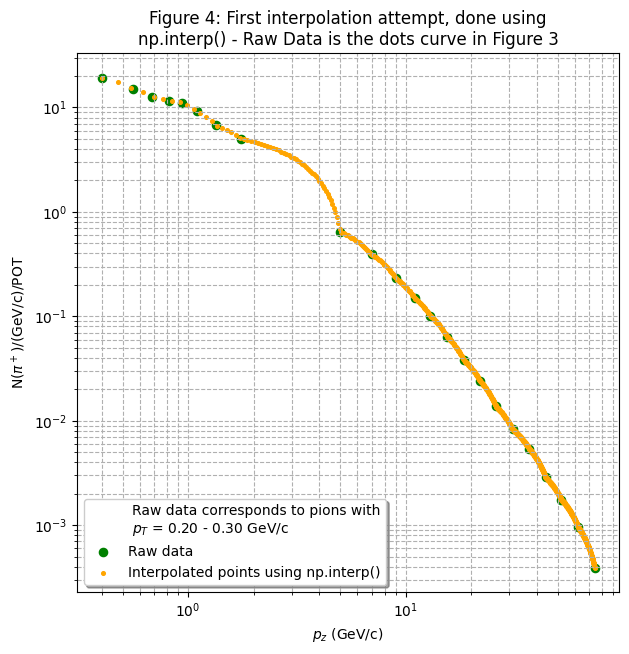

In [23]:
## FIRST APPROACH np.interp

green_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 2  ]['Final pi^+ plot value'] )
green_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 2  ]['pz (GeV=c) - mid range value'] )

f = plt.figure()
f.set_figwidth(7)
f.set_figheight(7)

plt.scatter(   x = green_dots_only_x_axis_values_list   ,   y = green_dots_only_y_axis_values_list    ,   c = "green" , s = 35 , label = "Raw data"  ) # The label is kept from the original pions dataframe


plt.xscale("log")
plt.yscale("log")
plt.grid( True , which = "both" , ls = "--" )

xnew_array = np.linspace(min(green_dots_only_x_axis_values_list), max(green_dots_only_x_axis_values_list), 1000)

green_dots_only_x_array = np.array(green_dots_only_x_axis_values_list)
green_dots_only_y_array = np.array(green_dots_only_y_axis_values_list)

ynew_array = np.interp( xnew_array , green_dots_only_x_array , green_dots_only_y_array ) # interpolation takes place here #


plt.scatter(   x = xnew_array   ,   y = ynew_array    ,   c = "orange"  ,  s = 7 , label =  "Interpolated points using np.interp()" )

plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")


plt.title("\n".join(wrap(r"Figure 4: First interpolation attempt, done using np.interp() - Raw Data is the dots curve in Figure 3" , 60 ) ) )


plt.legend( title = "\n".join(wrap(r"Raw data corresponds to pions with $p_{T}$ = 0.20 - 0.30 GeV/c" , 40 ) ) , shadow = True , fancybox = True  , alignment = "right" , loc = "lower left" )

plt.savefig('Figure 4: First interpolation attempt - np.interp().png' , dpi=200 , bbox_inches = "tight"  )



plt.show()


#FIGURE 4 COMMENTS:
#NOTE: The unwanted kink in the graph
#NOTE: The discrete nature of the interpolation, I need a continuously defined and smoothly varying function describing the interpolation.

In [24]:
## SECOND APPROACH interpolate.interp1d()  AND CUBICSPLINE

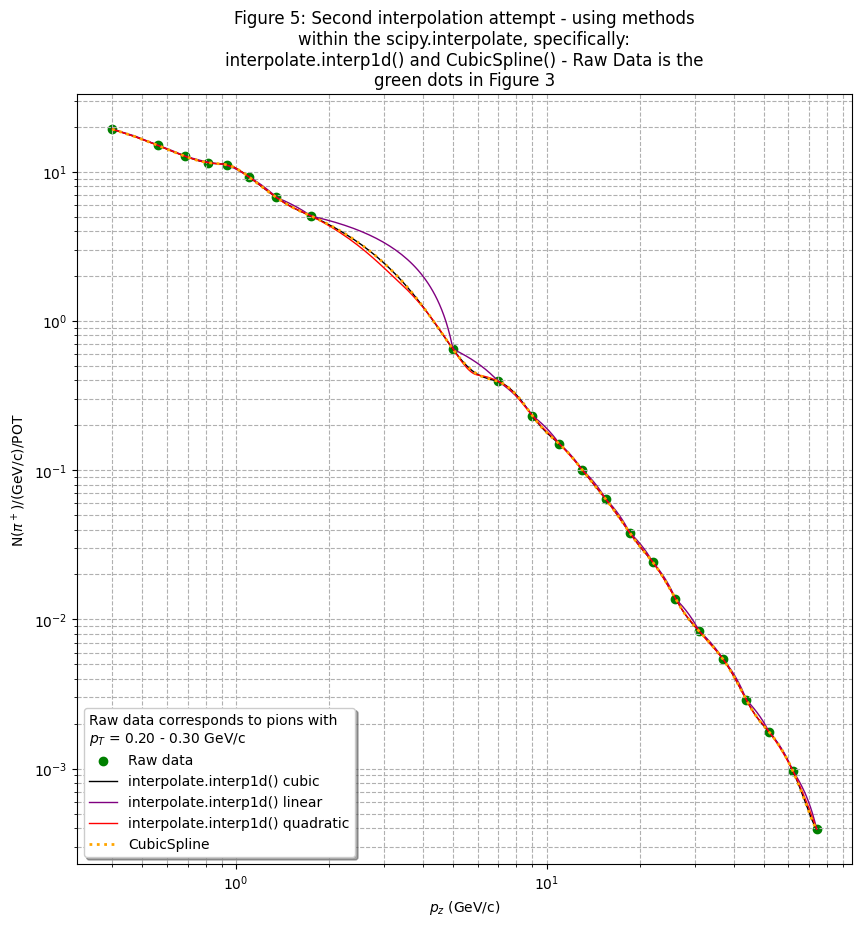

In [25]:
f = interpolate.interp1d(   green_dots_only_x_array  ,    green_dots_only_y_array , kind = 'cubic'   ) # I can alter the "kind" parameter. kind argument options: ‘linear’, ‘nearest’, ‘nearest-up’,
                                                                                                       # ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘previous’, or ‘next’. ‘zero’, ‘slinear’, ‘quadratic’ and ‘cubic’
ynew_array_interp1d = f(xnew_array)

f_2 = interpolate.interp1d(   green_dots_only_x_array  ,    green_dots_only_y_array , kind = 'linear'   )

ynew_array_interp1d_2 = f_2(xnew_array)

f_3 = interpolate.interp1d(   green_dots_only_x_array  ,    green_dots_only_y_array , kind = "quadratic"  )

ynew_array_interp1d_3 = f_3(xnew_array)

cs = CubicSpline(green_dots_only_x_array  ,  green_dots_only_y_array )

ynew_array_CubicSpline = cs(xnew_array)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.scatter(  green_dots_only_x_array  , green_dots_only_y_array  , marker = 'o' , color = "green" , label = "Raw data" )

plt.plot(  xnew_array  , ynew_array_interp1d  , color = "black" , label = "interpolate.interp1d() cubic" , linewidth = 1 )
plt.plot(  xnew_array  , ynew_array_interp1d_2  , color = "purple" , label = "interpolate.interp1d() linear" , linewidth = 1 )
plt.plot(  xnew_array  , ynew_array_interp1d_3  , color = "red" , label = "interpolate.interp1d() quadratic" , linewidth = 1 )
plt.plot(  xnew_array  , ynew_array_CubicSpline  , color = "orange" , label = "CubicSpline" , linewidth = 2 , linestyle = "dotted")


plt.xscale("log")
plt.yscale("log")
plt.grid( True , which = "both" , ls = "--" )

plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.title("\n".join(wrap(r"Figure 5: Second interpolation attempt - using methods within the scipy.interpolate, specifically: interpolate.interp1d() and CubicSpline() - Raw Data is the green dots in Figure 3" , 60 ) ) )


plt.legend( title = "\n".join(wrap(r"Raw data corresponds to pions with $p_{T}$ = 0.20 - 0.30 GeV/c" , 40 ) ) , shadow = True , fancybox = True  , alignment = "left" , loc = "lower left" )

plt.savefig('Figure 5: Second interpolation attempt - using methods within the scipy.interpolate, specifically: interpolate.interp1d() and CubicSpline().png' , dpi=200 , bbox_inches = "tight"  )


plt.show()


#FIGURE 5 COMMENTS:
#NOTE: The unwanted kink in the graph
#NOTE: The continuous nature of the interpolation, I have a continuously defined and smoothly varying function describing the interpolation.
#NOTE: I believe the best interpolation to be the red one, for it is the smoothest.

In [26]:
display(green_dots_only_x_array[8])
display(green_dots_only_y_array[8])

5.0

0.6469999999999999

In [27]:
## THIRD APPROACH remove a value from the raw data, the value where the kink appears.

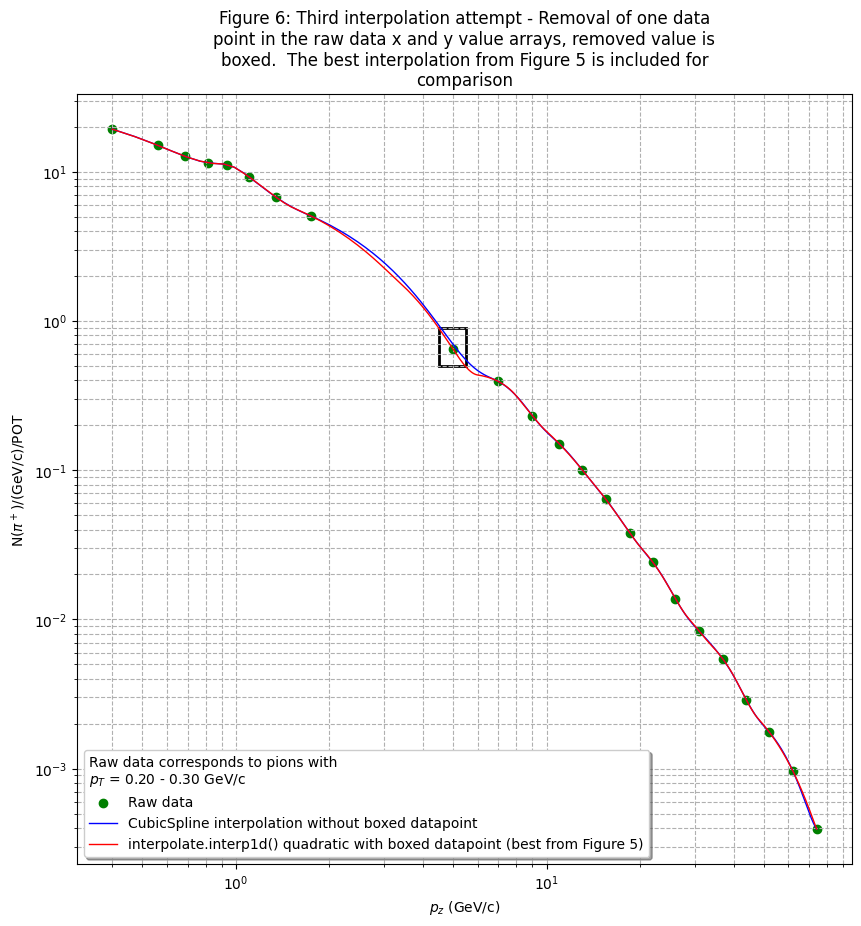

In [28]:
green_dots_one_removed_x = np.delete(   green_dots_only_x_array   ,   8  )

green_dots_one_removed_y = np.delete(   green_dots_only_y_array   ,   8  )

cs = CubicSpline(   green_dots_one_removed_x ,  green_dots_one_removed_y )

ynew_array_CubicSpline_test = cs(xnew_array)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

## Creating patches
rect = plt.Rectangle(( 4.5 , 0.5  ),  1  , 0.4 , linewidth=2, edgecolor='black', facecolor='none')

## Plotting patches
plt.gca().add_patch(rect)

plt.scatter(  green_dots_only_x_array  , green_dots_only_y_array  , marker = 'o' , color = "green" , label = "Raw data" )

plt.plot(   xnew_array    ,    ynew_array_CubicSpline_test    ,    color = "blue"    ,   label = "CubicSpline interpolation without boxed datapoint"    ,   linewidth = 1   ,   linestyle = "-"  )

## From Figure 5 for comparison purposes ##
plt.plot(  xnew_array  , ynew_array_interp1d_3  , color = "red" ,   label = "interpolate.interp1d() quadratic with boxed datapoint (best from Figure 5)"  , linewidth = 1 )


plt.xscale("log")
plt.yscale("log")
plt.grid( True , which = "both" , ls = "--" )

plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.title("\n".join(wrap(r"Figure 6: Third interpolation attempt - Removal of one data point in the raw data x and y value arrays, removed value is boxed.  The best interpolation from Figure 5 is included for comparison" , 60 ) ) )

plt.legend( title = "\n".join(wrap(r"Raw data corresponds to pions with $p_{T}$ = 0.20 - 0.30 GeV/c" , 40 ) ) , shadow = True , fancybox = True  , alignment = "left" , loc = "lower left" )

plt.savefig('Figure 6: Third interpolation attempt - Removal of one data point from raw data array.  Interpolation used is CubicSpline().png' , dpi=200 , bbox_inches = "tight"  )


plt.show()


#FIGURE 6 COMMENTS:
#The best curve looks to be the CubicSpline (blue line) without the boxed data point.
#I will plot this interpolated line on to Figure 5

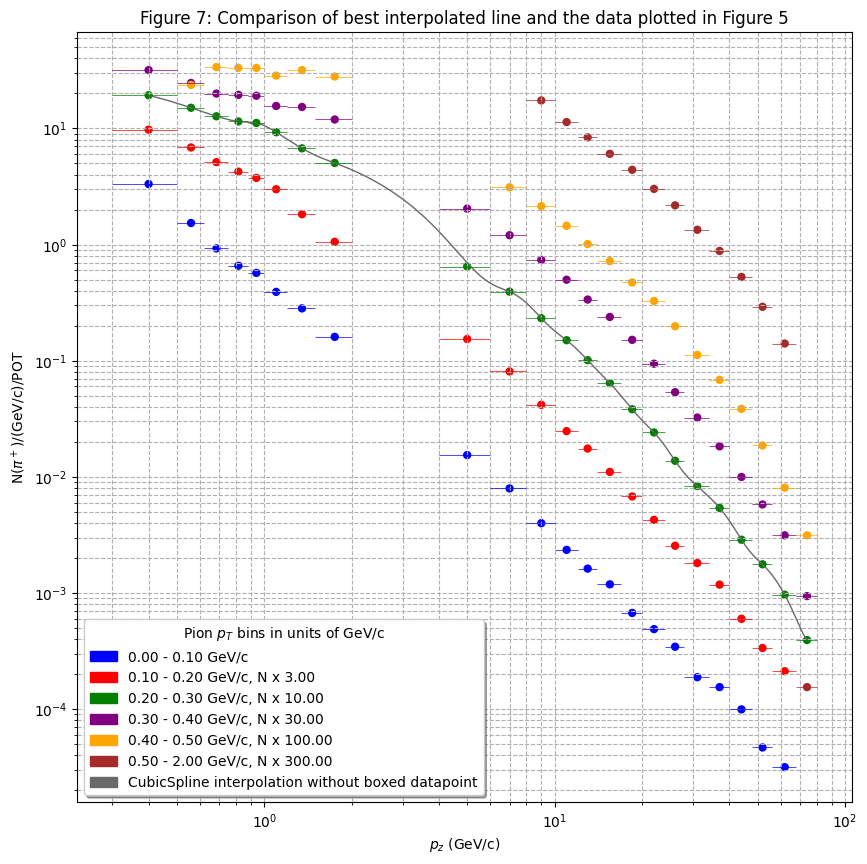

In [29]:
colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

labels_list = [ "0.00 - 0.10 GeV/c" , "0.10 - 0.20 GeV/c, N x 3.00"  ,  "0.20 - 0.30 GeV/c, N x 10.00"  ,  "0.30 - 0.40 GeV/c, N x 30.00"  ,  "0.40 - 0.50 GeV/c, N x 100.00"  ,  "0.50 - 2.00 GeV/c, N x 300.00" , "CubicSpline interpolation without boxed datapoint" ]


gray_patch = mpatches.Patch(color='dimgray', label='0.00 - 0.10 GeV/c' )

blue_patch = mpatches.Patch(color='blue', label='0.00 - 0.10 GeV/c' )
red_patch = mpatches.Patch(color='red', label='0.10 - 0.20 GeV/c, N x 3.00')
green_patch = mpatches.Patch(color='green', label='0.20 - 0.30 GeV/c, N x 10.00')
purple_patch = mpatches.Patch(color='purple', label='0.30 - 0.40 GeV/c, N x 30.00')
orange_patch = mpatches.Patch(color='orange', label='0.40 - 0.50 GeV/c, N x 100.00')
brown_patch = mpatches.Patch(color='brown', label='0.50 - 2.00 GeV/c, N x 300.00')


handles_for_legend =  [  blue_patch , red_patch ,  green_patch ,  purple_patch , orange_patch , brown_patch , gray_patch ]


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.scatter(   x = Pion_Plots_df1["pz (GeV=c) - mid range value"]   ,   y = Pion_Plots_df1["Final pi^+ plot value"]    ,   c = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours) , s = 25 , label =  labels_list )

plt.plot(   xnew_array    ,    ynew_array_CubicSpline_test    ,    color = "dimgray"    ,   label = "CubicSpline interpolation without boxed datapoint"    ,   linewidth = 1   ,   linestyle = "-"  )



plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"], yerr  =  None , xerr = Pion_Plots_df1["bin width"] ,
            ls = None , fmt = 'none' , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours), elinewidth = Pion_Plots_df1["error bar line width"] )


plt.xscale("log")
plt.yscale("log")
plt.grid( True , which = "both" , ls = "--" )

plt.legend(  labels = labels_list , handles = handles_for_legend , shadow = True , fancybox = True , title = r"Pion $p_{T}$ bins in units of GeV/c" )

plt.title("\n".join(wrap(r"Figure 7: Comparison of best interpolated line and the data plotted in Figure 5" , 120 ) ) )


plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.savefig('Figure 7: Comparison of best interpolated line and the data plotted in Figure 5.png' , dpi=200 , bbox_inches = "tight")


plt.show()

#FIGURE 7 COMMENTS
#I consider the interpolated curve, appearing in gray, to be a decent fit to the data.  I will use this interpolated line as the basis for the allocation of weights to simulated pions in my earlier coded function.

###AFTER you have done all the above... FOCUS on the below...

-----------------------------------------------------------------------
-----------------------------------------------------------------------
/


###You must then begin to incoporate the trigonometry of the off axis beam and the different segments of the near detector into the simulation.  

###You must then produce histograms for each of these different slithers of the near detector and comapre them to the literature.

###If the peaks of the histograms occur in the correct location (in terms of the x-axis), but they are too high or too low, then you must normalise them accordingly.

###Then you have the beginnings of a rudimentary beam simulation, and can then begin thinking about complexifying it by adding parameters.  For example, you could incorporate the magnitude of the transverse momentum into your simulation.  Currently we are not considering transverse momentum as a parameter.

/
-----------------------------------------------------------------------
-----------------------------------------------------------------------


In [30]:
## Need to have some idea of how far away the near detector is from the start of the neutrino beam
## Also don't know where the start of the neutrino beam occurs... from where do they start measuring distances to the detectors?


## Need to upload the detector extents csv file.

## Need to copy paste my functions over, or create a new notebook with the relevant cells from above and the previously coded functions.

In [36]:
m_pi = 139.6 * ( 10 ** -3 )        # Units = GeV ( Source = PDF saved as: "(FIRST PLOTTING TASK) - An Off-Axis Neutrino Beam - Kirk T. McDonald - 0111033v1" )

E_v_star = 29.8 * ( 10 ** -3 )     # Units = GeV ( Source =  = PDF saved as: "(FIRST PLOTTING TASK) - An Off-Axis Neutrino Beam - Kirk T. McDonald - 0111033v1" )

E_pro = 12                     # Units = GeV  ( Source = https://en.wikipedia.org/wiki/Fermilab#Fermilab_Accelerator_Complex )

# E_pro = 120

In [44]:
####################### FIRST TRY RELATIVE NEUTRINO FLUX WITH PROTON ENERGY UNCERTAINTY ######################

#### FUNCTION DOES NOT INCLUDE PION WEIGHTING ####

def FIRST_TRY_Relative_Neutrino_Flux_Plotter_with_Proton_Energy_Uncertainty( theta ):

        E_v = np.linspace( 0 , 4 , 10000000 )

        my_mean = 120

        my_std = 6   # standard deviation, "spread" or "width"    #### WHAT IS THE STANDARD DEVITAITON OF THE PROTON ENERGY DISTRIBUTION FOR PROTONS COMING OUT OF THE MAIN INJECTOR? ####
                                                                   #### My standard deviation is very large ####

        E_pro_array = np.random.normal(loc = my_mean, scale = my_std, size=10000000) ## Producing an array of proton energies.

        cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )

        E_pi = (  (m_pi * E_v )    /  (   E_v_star * ( 1 + cos_theta_star )  )   )

        #### FUNCTION DOES NOT INCLUDE PION WEIGHTING ####

        Rel_Neu_Flux = ( ( ( E_pro - E_pi ) ** 5 ) * ( ( E_pi * E_v ) / ( cos_theta_star ) ) )

        Rel_Neu_Flux[np.isnan(Rel_Neu_Flux)] = 0

        for i in range(1, len(Rel_Neu_Flux)):
                neighbouring_element_difference = (Rel_Neu_Flux[i] - Rel_Neu_Flux[i-1])

                if neighbouring_element_difference == 0.000:

                        break
                else:

                        continue

        Rel_Neu_Flux = Rel_Neu_Flux[:i]

        E_v = E_v[:i]

        return E_v , Rel_Neu_Flux , E_pro_array , E_pi

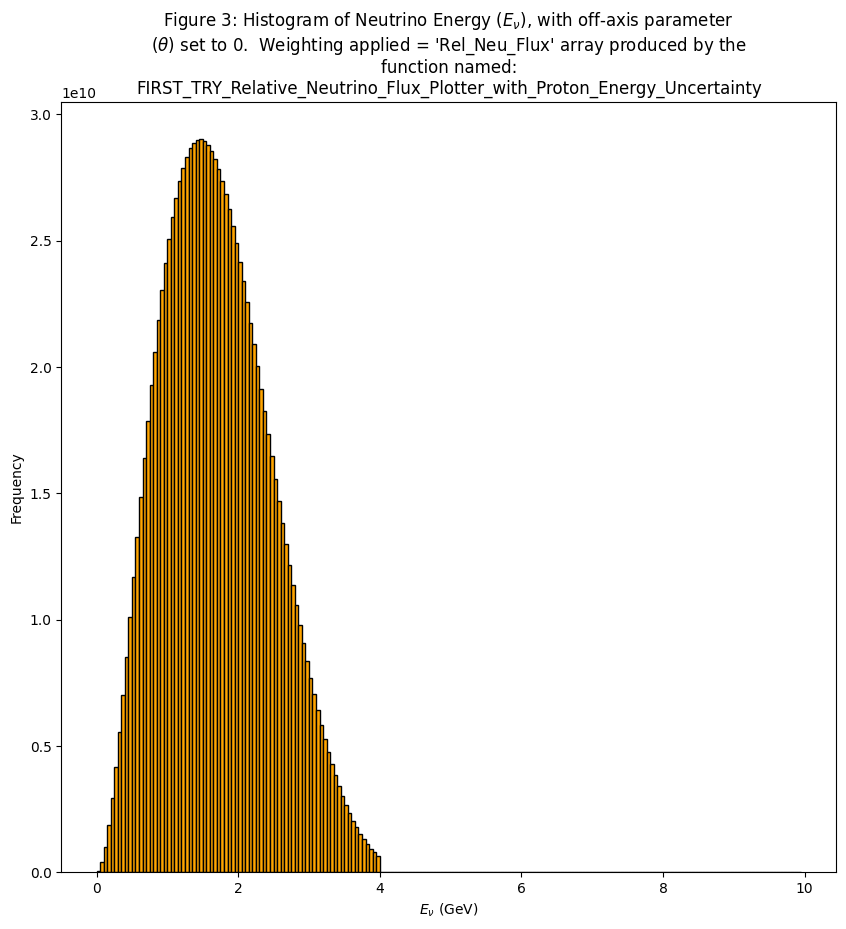

In [46]:
x_1 , y_1 , z_1 , E_pi_datatype_test = FIRST_TRY_Relative_Neutrino_Flux_Plotter_with_Proton_Energy_Uncertainty( 0.00 )

plt.figure(figsize=(10, 10))
#plt.plot( x_1 , y_1 , "-o" , color = "brown", linewidth = 0.5 , markersize = 1, label = r'$\theta$ = 0.014' )

plt.hist( x_1 , bins = np.arange( 0 , 10 , 0.05 )  , weights =  y_1 , edgecolor = "black" , ls = "-" , color = "orange" )

plt.title("\n".join(wrap(r"Figure 3: Histogram of Neutrino Energy ($E_{\nu}$), with off-axis parameter ($\theta$) set to 0.  Weighting applied = 'Rel_Neu_Flux' array produced by the function named: FIRST_TRY_Relative_Neutrino_Flux_Plotter_with_Proton_Energy_Uncertainty  " , 80 ) ) )

# plt.title("\n".join(wrap(r"Figure 7: Comparison of best interpolated line and the data plotted in Figure 5" , 120 ) ) )




plt.xlabel(r"$E_{\nu}$ (GeV)")
plt.ylabel("Frequency")

plt.show()

In [47]:
print(type(E_pi_datatype_test))

<class 'numpy.ndarray'>


In [48]:
## FIRST ATTEMPT AT ADDING PION WEIGHTING ##

def FIRST_TRY_Relative_Neutrino_Flux_Plotter_includes_Proton_Energy_Uncertainty_and_Pion_Weighting( theta ):

        E_v = np.linspace( 0 , 4 , 10000000 )

        my_mean = 120

        my_std = 6   # standard deviation, "spread" or "width"    #### WHAT IS THE STANDARD DEVITAITON OF THE PROTON ENERGY DISTRIBUTION FOR PROTONS COMING OUT OF THE MAIN INJECTOR? ####
                                                                   #### My standard deviation is very large ####

        E_pro_array = np.random.normal(loc = my_mean, scale = my_std, size=10000000) ## Producing an array of proton energies.

        cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )

        E_pi = (  (m_pi * E_v )    /  (   E_v_star * ( 1 + cos_theta_star )  )   )

        #### INSERT PION WEIGHTING HERE ####




        #### INSERT PION WEIGHTING HERE ####

        Rel_Neu_Flux = ( ( ( E_pro - E_pi ) ** 5 ) * ( ( E_pi * E_v ) / ( cos_theta_star ) ) )

        Rel_Neu_Flux[np.isnan(Rel_Neu_Flux)] = 0

        for i in range(1, len(Rel_Neu_Flux)):
                neighbouring_element_difference = (Rel_Neu_Flux[i] - Rel_Neu_Flux[i-1])

                if neighbouring_element_difference == 0.000:

                        break
                else:

                        continue

        Rel_Neu_Flux = Rel_Neu_Flux[:i]

        E_v = E_v[:i]

        return E_v , Rel_Neu_Flux , E_pro_array , E_pi

In [50]:
x_1 , y_1 , z_1 , E_pi_datatype_test_2 = FIRST_TRY_Relative_Neutrino_Flux_Plotter_includes_Proton_Energy_Uncertainty_and_Pion_Weighting( 0.00 )


np.shape(E_pi_datatype_test_2)

(10000000,)